## **Analysis Report for Bellabeat**
---
***Auther: Alison Mo***<br>
***Date: Feb, 2022***

### Import Packages

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ───────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Read Datasets and Explore

In [2]:
activity <- read.csv("./Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("./Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("./Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("./Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("./Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [3]:
str(activity)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : Factor w/ 31 levels "4/12/2016","4/13/2016",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1

In [4]:
str(calories)

'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: Factor w/ 736 levels "4/12/2016 1:00:00 AM",..: 7 1 9 11 13 15 17 19 21 23 ...
 $ Calories    : int  81 61 59 47 48 48 48 47 68 141 ...


In [5]:
str(intensities)

'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : Factor w/ 736 levels "4/12/2016 1:00:00 AM",..: 7 1 9 11 13 15 17 19 21 23 ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...


In [6]:
str(sleep)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : Factor w/ 31 levels "4/12/2016 12:00:00 AM",..: 1 2 4 5 6 8 9 10 12 13 ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


In [7]:
str(weight)

'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : Factor w/ 56 levels "4/12/2016 11:59:59 PM",..: 44 45 3 19 42 11 47 13 26 37 ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: Factor w/ 2 levels "False","True": 2 2 1 2 2 2 2 2 2 2 ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


### Preprocess the Date / Time-related Columns

In [8]:
# Activity
activity$ActivityDate = as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format ="%m/%d/%y")

# Calories
calories$ActivityHour = as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format ="%H:%M:%S")
calories$date <- format(calories$ActivityHour, format ="%m/%d/%y")

# Intensities
intensities$ActivityHour = as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format="%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format="%m/%d/%y")

# Sleep
sleep$SleepDay = as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format ="%m/%d/%y")

### Remove Duplicates and Drop NA Values (if any)

In [9]:
# Finding duplicates

sum(duplicated(activity))

sum(duplicated(calories))

sum(duplicated(intensities))

sum(duplicated(sleep))

sum(duplicated(weight))

[1] 0

[1] 0

[1] 0

[1] 3

[1] 0

In [10]:
# Drop NA values (skip weight dataset since its Fat column is mostly NA)

activity <- activity %>% 
    drop_na()

calories <- calories %>% 
    drop_na()

intensities <- intensities %>% 
    drop_na()

sleep <- sleep %>% 
    drop_na() %>%
    unique()

In [11]:
# Check duplicates for sleep dataset again

sum(duplicated(sleep))

[1] 0

### Identify the Number of Individual Users

In [12]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

In [13]:
# Ativity
activity %>%  
    select(
        TotalSteps,
        TotalDistance,
        VeryActiveDistance,
        ModeratelyActiveDistance,
        LightActiveDistance,
        Calories
        ) %>%
    summary()

   TotalSteps    TotalDistance    VeryActiveDistance ModeratelyActiveDistance
 Min.   :    0   Min.   : 0.000   Min.   : 0.000     Min.   :0.0000          
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 0.000     1st Qu.:0.0000          
 Median : 7406   Median : 5.245   Median : 0.210     Median :0.2400          
 Mean   : 7638   Mean   : 5.490   Mean   : 1.503     Mean   :0.5675          
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 2.053     3rd Qu.:0.8000          
 Max.   :36019   Max.   :28.030   Max.   :21.920     Max.   :6.4800          
 LightActiveDistance    Calories   
 Min.   : 0.000      Min.   :   0  
 1st Qu.: 1.945      1st Qu.:1828  
 Median : 3.365      Median :2134  
 Mean   : 3.341      Mean   :2304  
 3rd Qu.: 4.782      3rd Qu.:2793  
 Max.   :10.710      Max.   :4900  

In [14]:
# Explore num of active minutes

activity %>%
    select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
    summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

In [15]:
# Calories
calories %>%
    select(Calories) %>%
    summary()

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

In [16]:
# Sleep
sleep %>%
    select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
    summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

In [17]:
# Weight
weight %>%
    select(WeightKg, BMI) %>%
    summary()

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

### Merge the Sleep Dataset with the Activity Dataset to Explore Possible Correlation

In [18]:
merged_data <- merge(sleep, activity, by=c('Id', 'date'))
head(merged_data)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


### Correlation Visualization and Findings

- A positive correlation could be found between TotalDistance and Calories

`geom_smooth()` using formula 'y ~ x'



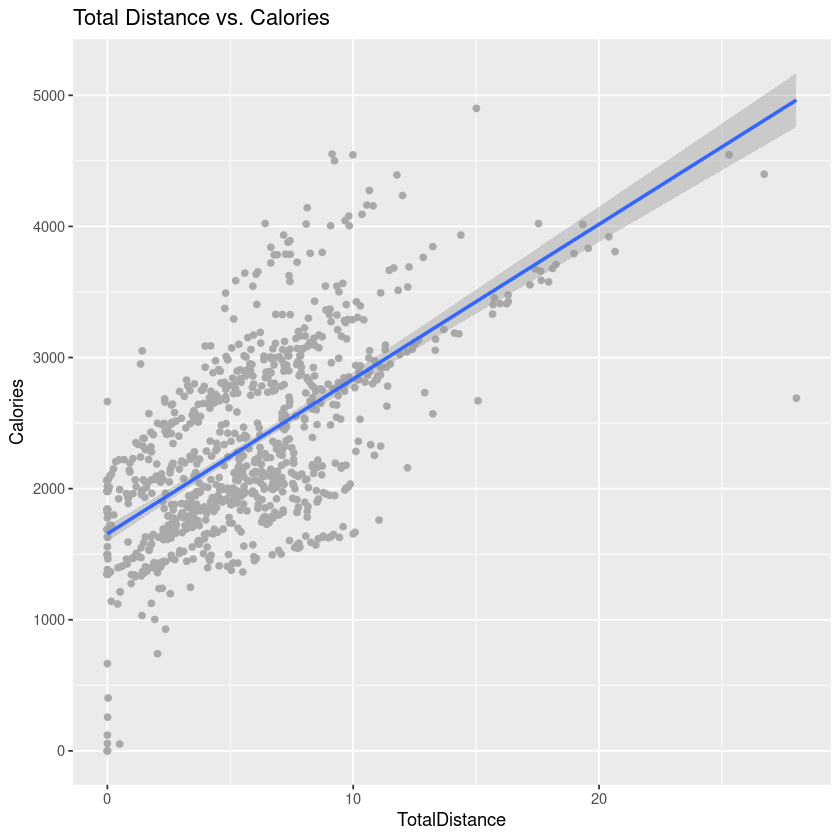

In [19]:
ggplot(data=activity, aes(x=TotalDistance, y=Calories)) + 
    geom_point(color='darkgray') + 
    geom_smooth(method = "lm") +
    labs(title="Total Distance vs. Calories")

- A positive correlation could be found between VeryActiveMinutes and Calories

`geom_smooth()` using formula 'y ~ x'



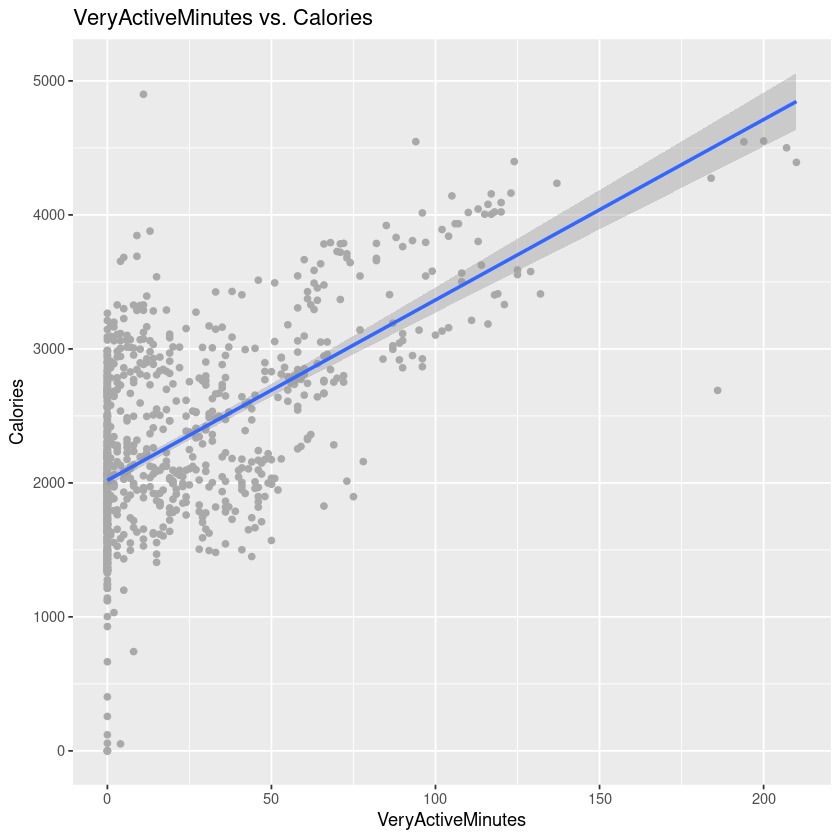

In [20]:
ggplot(data=activity, aes(x=VeryActiveMinutes, y=Calories)) + 
    geom_point(color='darkgray') + 
    geom_smooth(method = "lm") +
    labs(title="VeryActiveMinutes vs. Calories")

- No significant correlation could be found between SedentaryMinutes and Calories

`geom_smooth()` using formula 'y ~ x'



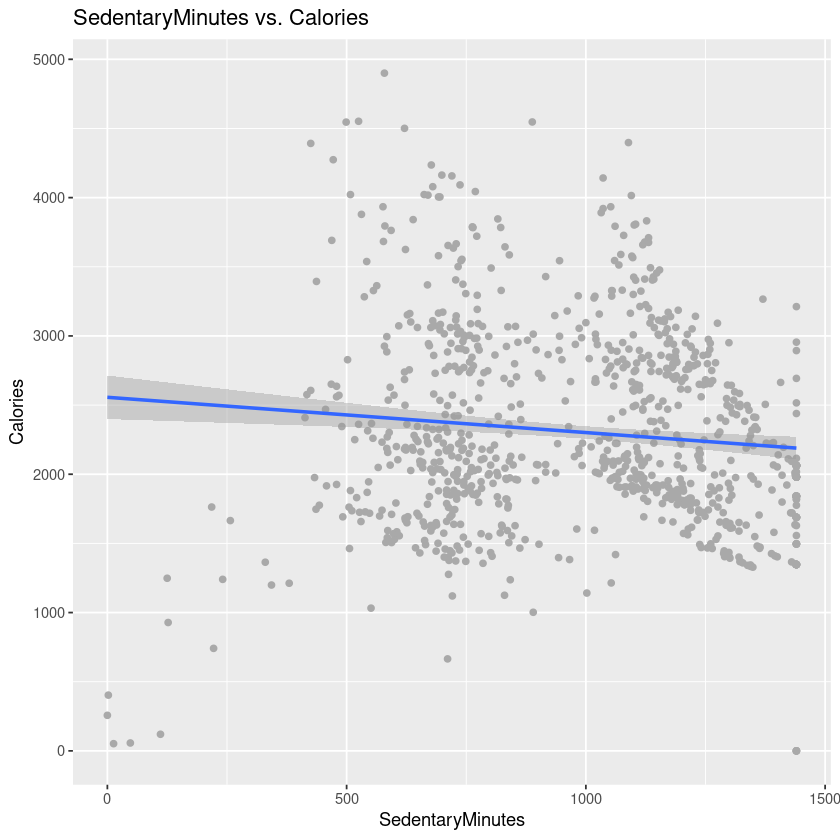

In [21]:
ggplot(data=activity, aes(x=SedentaryMinutes, y=Calories)) + 
    geom_point(color='darkgray') + 
    geom_smooth(method = "lm") +
    labs(title="SedentaryMinutes vs. Calories")

- A strong correlation could be found between TotalMinutesAsleep and TotalTimeInBed
- In general, TotalTimeInBed is longer than TotalMinutesAsleep. The time ratio varies between different users

`geom_smooth()` using formula 'y ~ x'



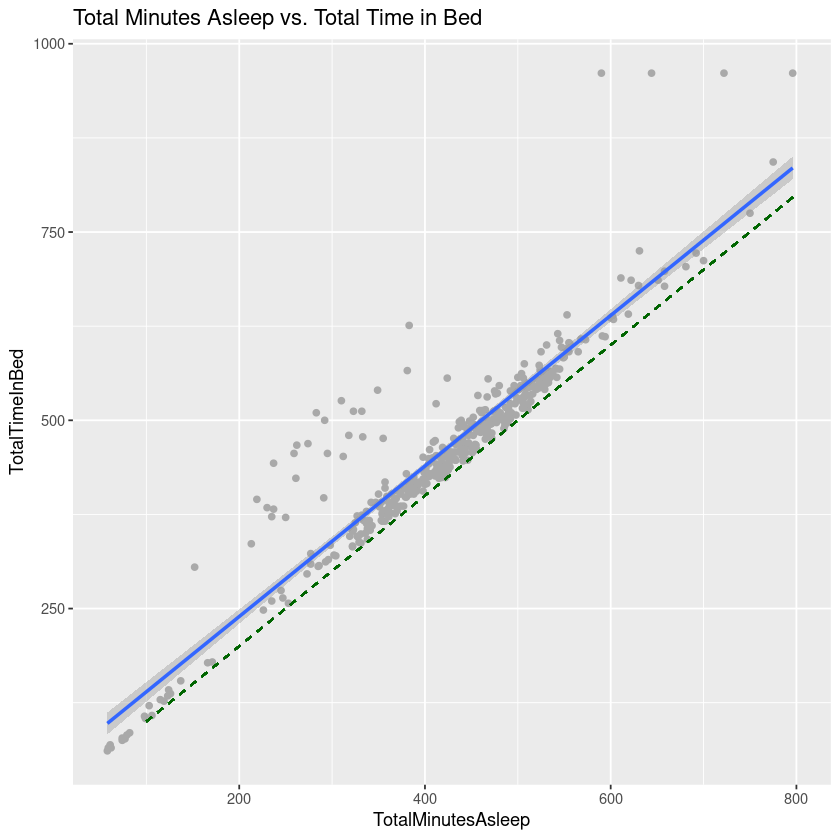

In [22]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
    geom_point(color='darkgray') +
    geom_smooth(method = "lm") +
    labs(title="Total Minutes Asleep vs. Total Time in Bed") + 
    geom_segment(aes(x = 100, y = 100, xend = 800, yend = 800),
                 color="darkgreen",
                 linetype="dashed"
                )

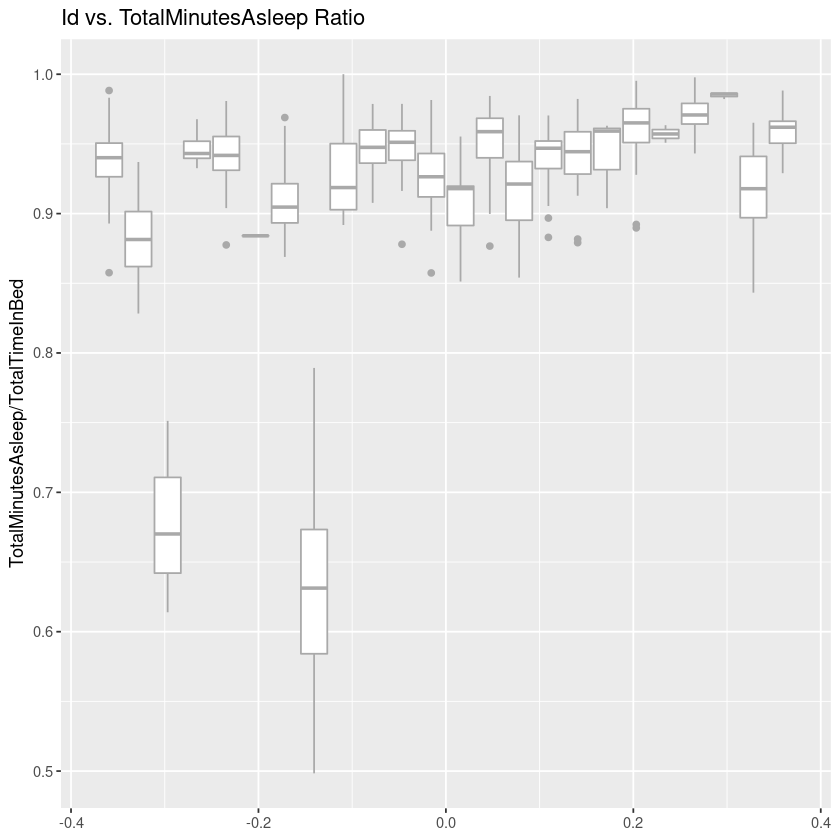

In [23]:
ggplot(data=sleep, aes(group=Id, y=TotalMinutesAsleep/TotalTimeInBed)) + 
    geom_boxplot(color='darkgray') + 
    labs(title="Id vs. TotalMinutesAsleep Ratio")

- Judging by median value, a bimodal distribution in time could be found for the TotalIntensity
- First peak is around noon and second peak is around 5-6PM
- Judging by total median value, the users activities are more active in the time span between 8AM to 9PM

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


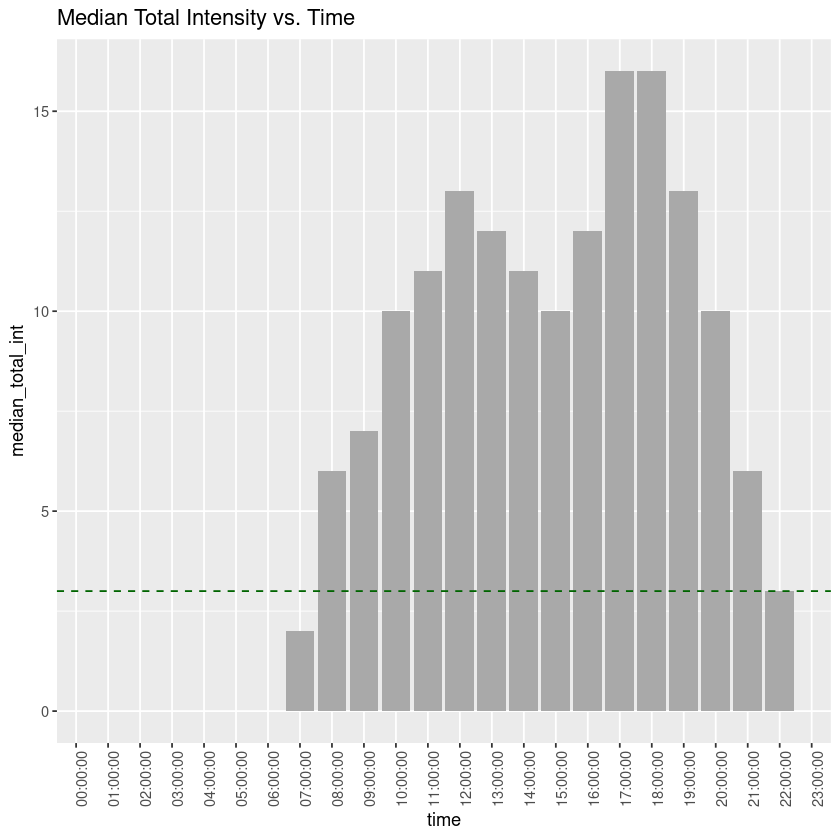

In [24]:
intensities_new <- intensities %>%
    group_by(time) %>%
    summarise(median_total_int = median(TotalIntensity))

ggplot(data=intensities_new, aes(x=time, y=median_total_int)) + 
    geom_histogram(stat = "identity", fill="darkgray") +
    theme(axis.text.x = element_text(angle = 90)) +
    labs(title="Median Total Intensity vs. Time") +
    geom_hline(yintercept = median(intensities$TotalIntensity),
               color = "darkgreen",
               linetype = "dashed"
              )

- A negative correlation could be found between TotalMinutesAsleep and SedentaryMinutes

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



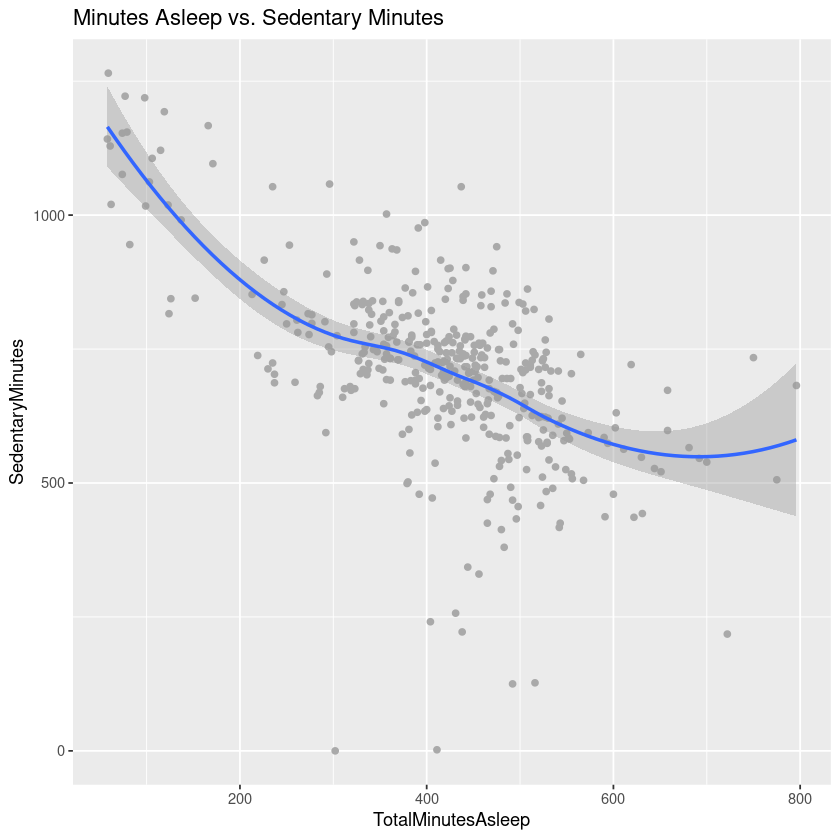

In [25]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
    geom_point(color='darkgray') + 
    geom_smooth() +
    labs(title="Minutes Asleep vs. Sedentary Minutes")

## Recommendations to Bellabeat

- Calories consumption estimation by the collected distance and active minutes data could be an useful feature
    - There are correlations between distance / active minutes and calories


- Sleep tracking could be an interesting topic to look into
    - In the anlysis, the time ratio between Total Minutes Asleep and Total Time in Bed is used as a metric to track the sleep quality between users


- User activity intensity distribution in time could be a good way for comparing different user behavior
    - User could compare the their own distribution with the median distribution for reference


- A reminder message could be sent when the Sedentary Minutes is identified to be high
    - High Sedentary Minutes could correlate to less Minutes Asleep. 